# Heart Disease Prediction

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading csv file
heart=pd.read_csv("heart.csv")

In [3]:
#checking the dataframe
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Exploratory Data Analysis

In [4]:
#checking number of rows and columns
heart.shape

(1025, 14)

In [5]:
#Checking columns
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Columns info

age
age in years

sex
(1 = male; 0 = female)

cp
chest pain type
chest pain type (4 values)

trestbps
resting blood pressure (in mm Hg on admission to the hospital)

chol
serum cholestoral in mg/dl

fbs
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

restecg
resting electrocardiographic results(values 0,1,2)

thalach
maximum heart rate achieved

exang
exercise induced angina (1 = yes; 0 = no)

oldpeak
ST depression induced by exercise relative to rest

slope
the slope of the peak exercise ST segment

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

serum cholestoral in mg/dl

number of major vessels (0-3) colored by flourosopy

In [6]:
#finding duplicates in dataset
heart.duplicated().sum()

723

In [7]:
#Removing Duplicates from dataset
heart.drop_duplicates(inplace=True)

In [8]:
#Checking shape after removing duplicates
heart.shape

(302, 14)

In [9]:
#Checking dataset info
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [10]:
#Checking missing values
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
#Descriptive statistics
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1    164
0    138
Name: target, dtype: int64


1=problem in heart
0=healty heart




C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


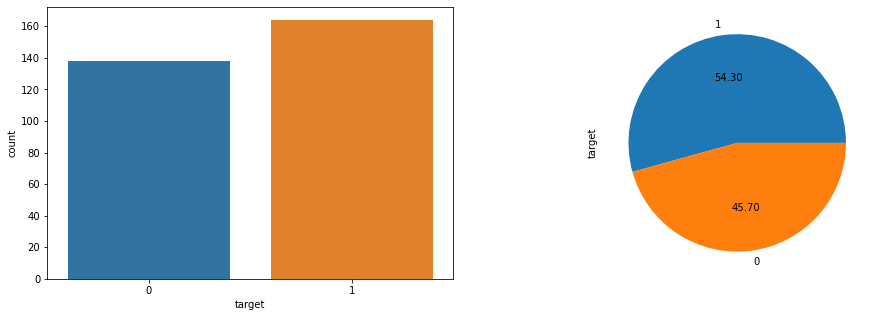

In [12]:
print(heart["target"].value_counts())
print("\n")
print("1=problem in heart")
print("0=healty heart")
print("\n")

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.countplot(heart["target"],data=heart)

plt.subplot(1,2,2)
heart["target"].value_counts().plot.pie(autopct="%.2f")
plt.show()

**From above plots it is evident that target column is almost balanced.**

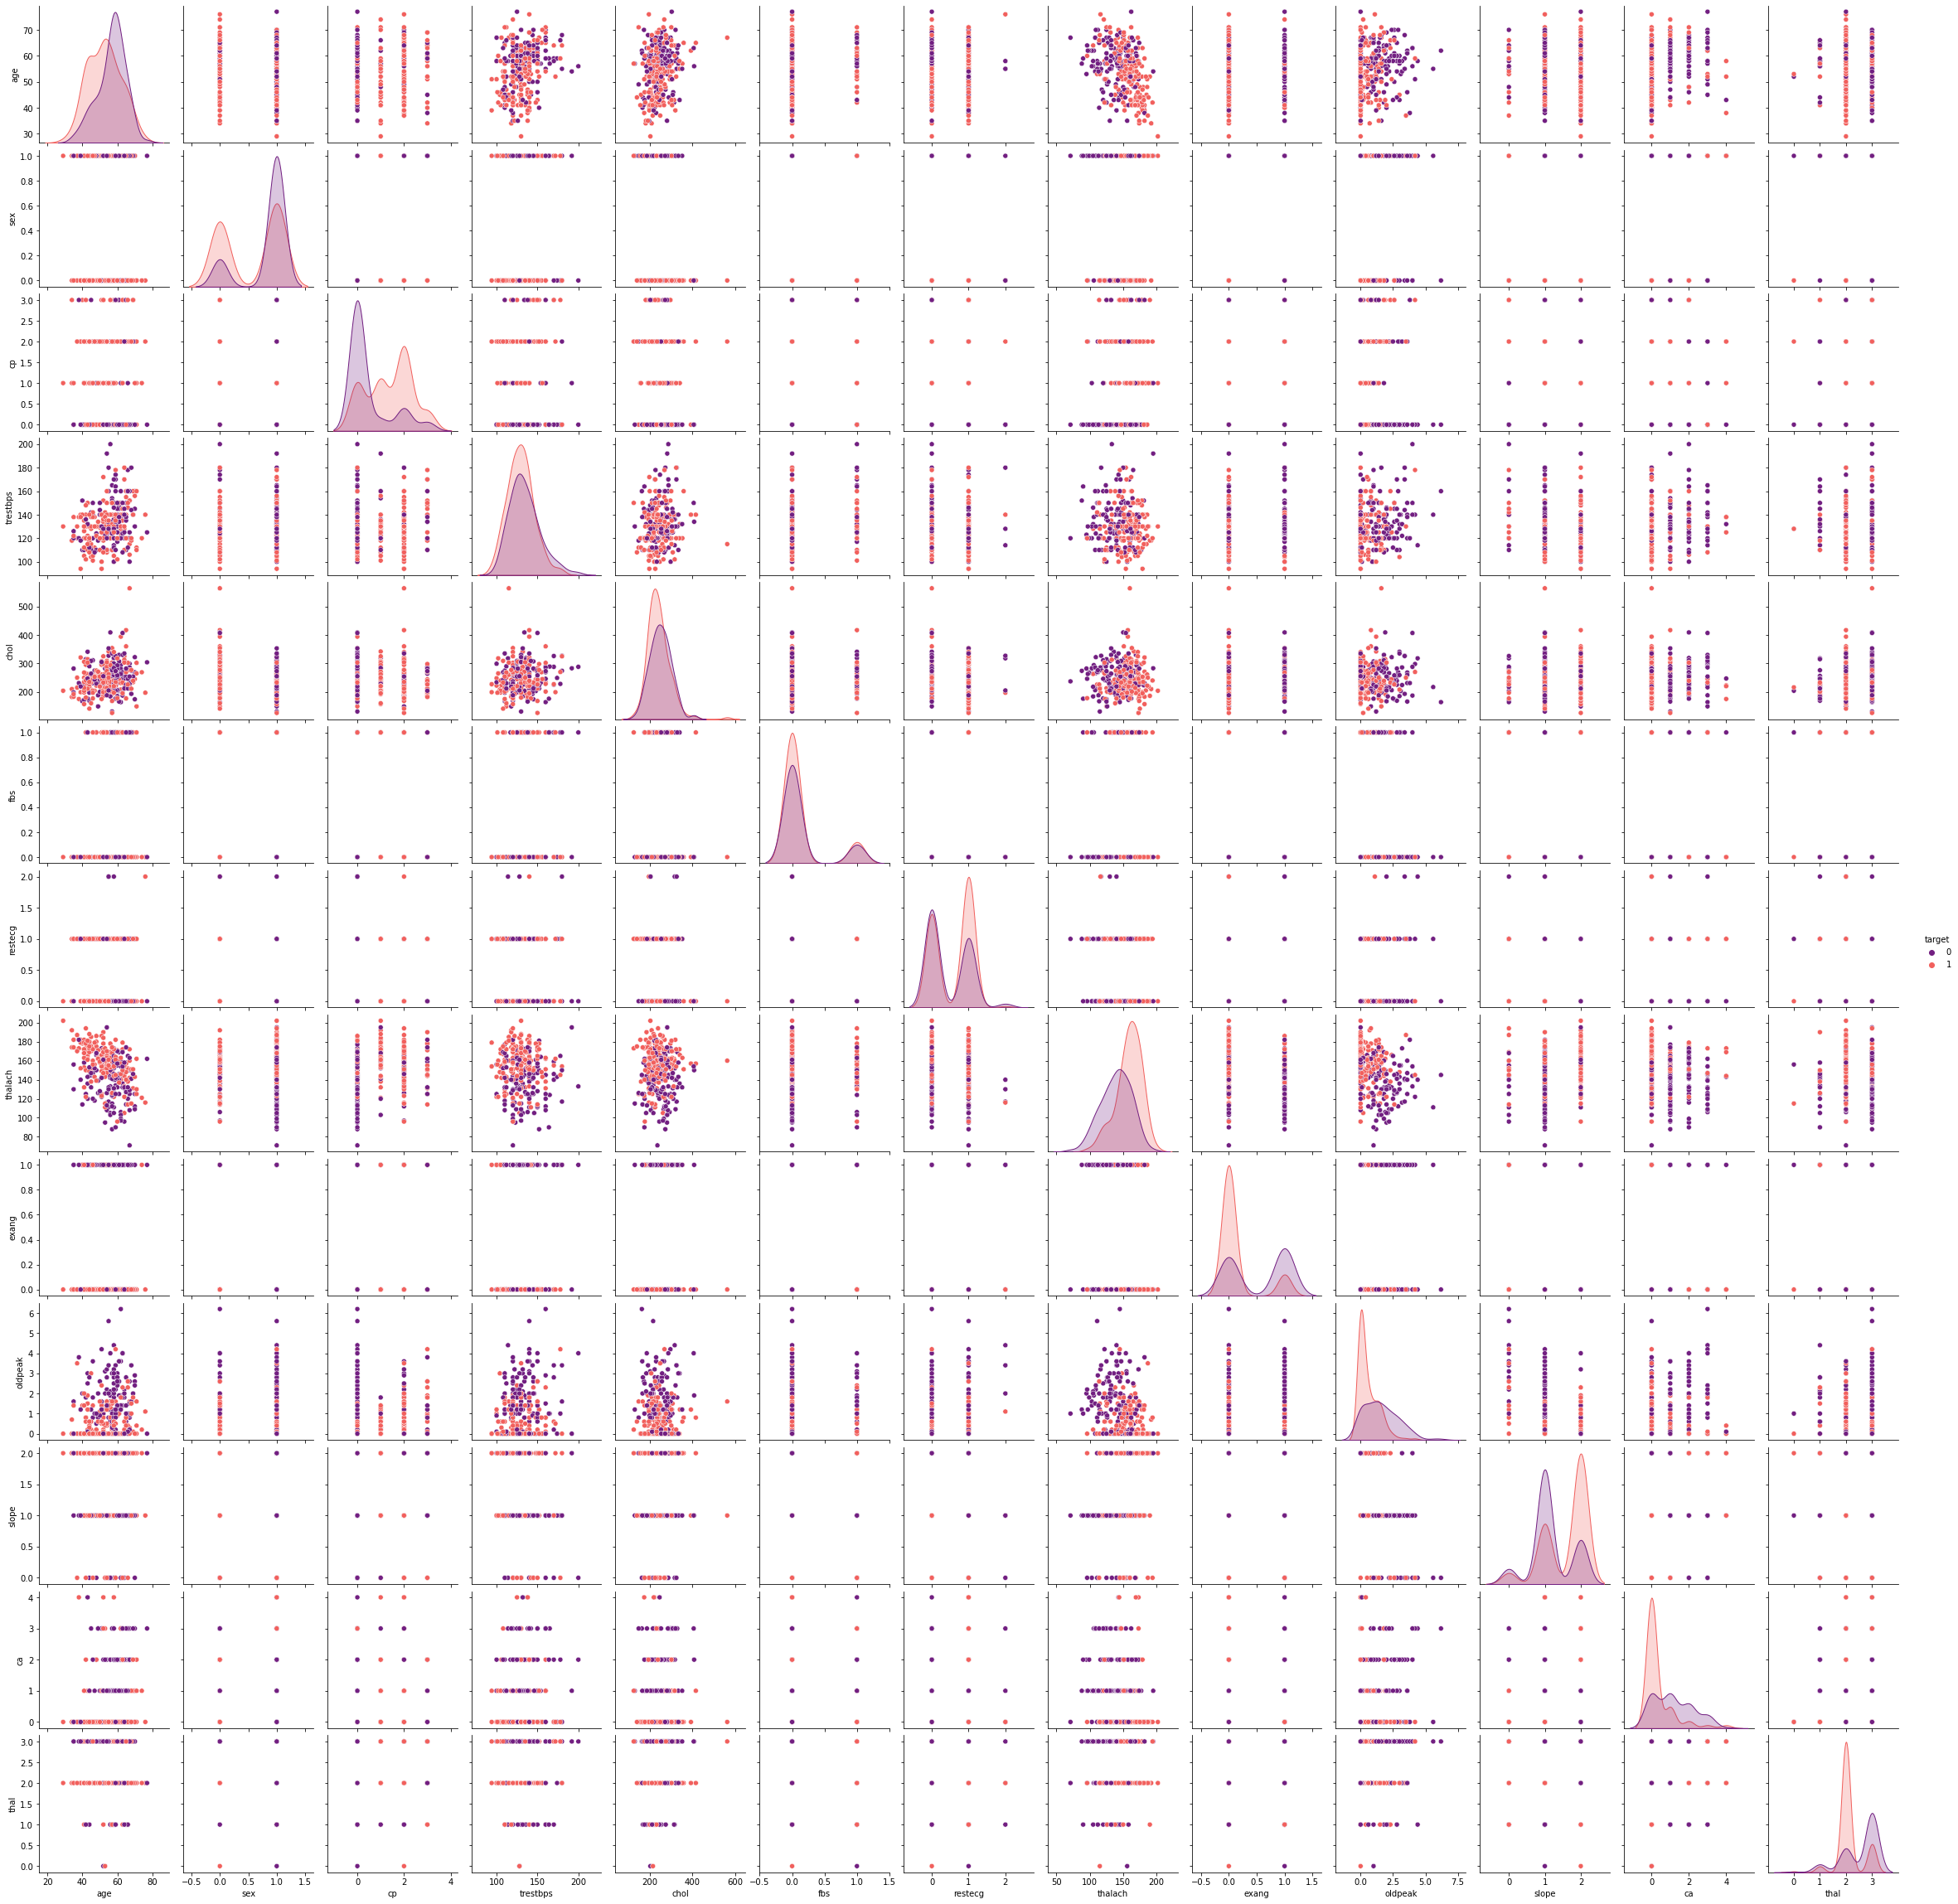

In [13]:
sns.pairplot(data=heart,hue='target',palette='magma')

<AxesSubplot:xlabel='sex', ylabel='count'>

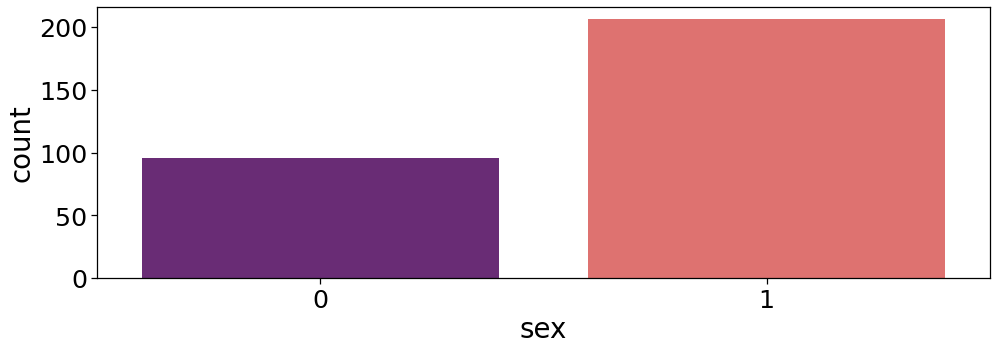

In [107]:
plt.figure(figsize=(16,5))
sns.countplot(x='sex',data=heart,palette='magma')

**The male presents in the dataset is 2times the female.**

<AxesSubplot:xlabel='sex', ylabel='count'>

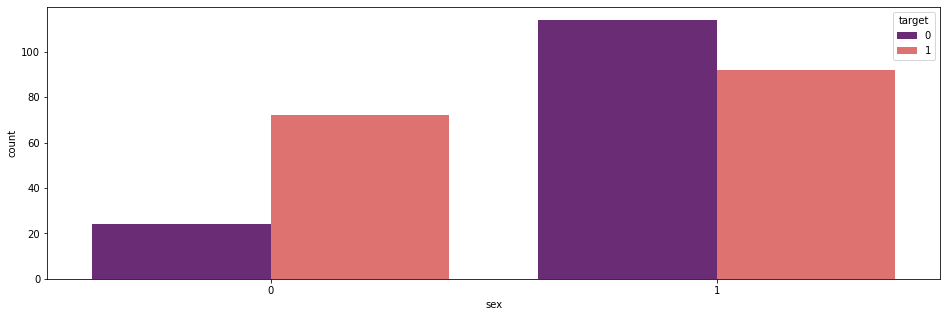

In [14]:
plt.figure(figsize=(16,5))
sns.countplot(x='sex',hue='target',data=heart,palette='magma')

**Females have more heart problem then the males.**

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


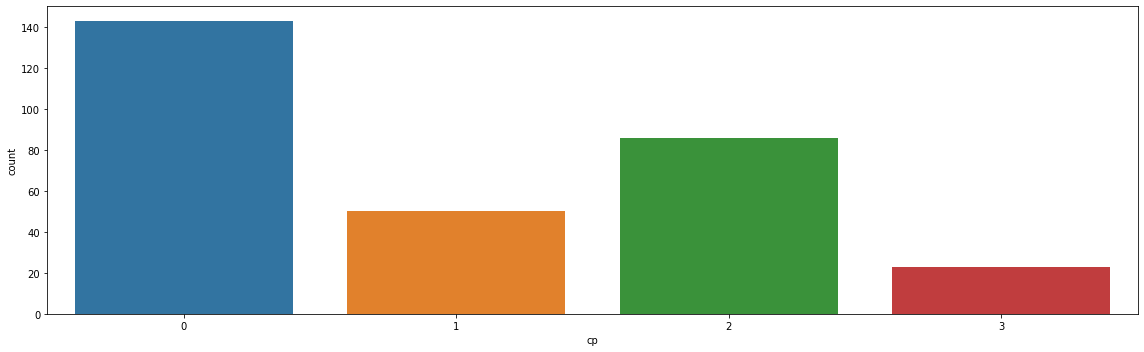

In [15]:
plt.figure(figsize=(16,5))
sns.countplot(heart['cp'])
plt.tight_layout()

**As chest pain range from 0 to 3, it means3 has most worst condition.**

<AxesSubplot:xlabel='cp', ylabel='count'>

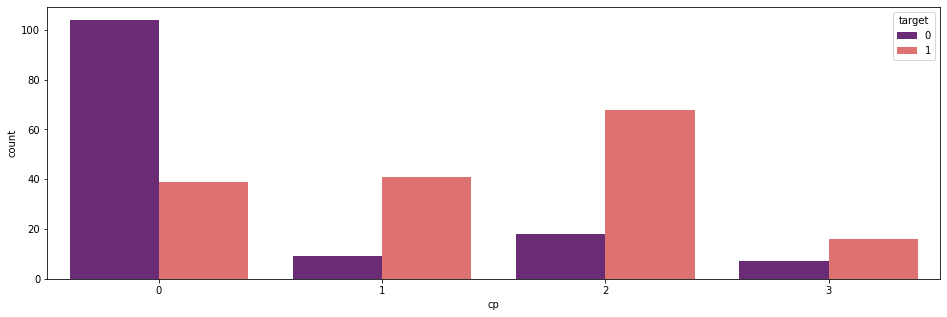

In [16]:
plt.figure(figsize=(16,5))
sns.countplot(x='cp',hue='target',data=heart,palette='magma')

**People having less chest pain(0) it means less problem of heart disease.**

**People having saviour chest pain(3) it means high chances of heart disease problem.**

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


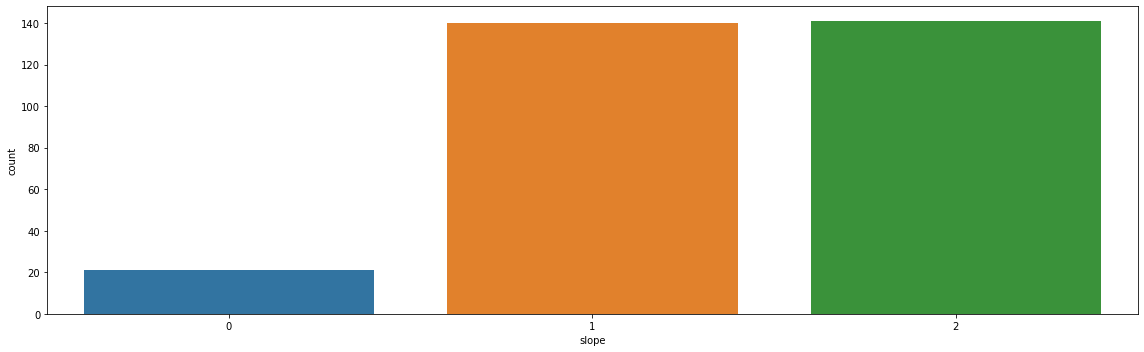

In [17]:
plt.figure(figsize=(16,5))
sns.countplot(heart['slope'])
plt.tight_layout()

<AxesSubplot:xlabel='slope', ylabel='count'>

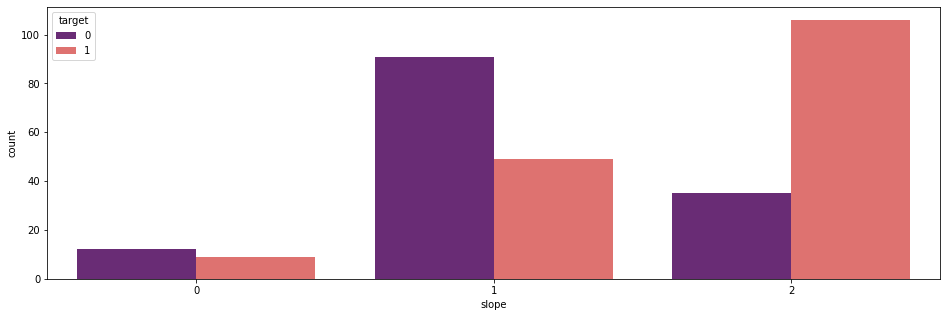

In [18]:
plt.figure(figsize=(16,5))
sns.countplot(x='slope',hue='target',data=heart,palette='magma')

**People having slope 2 have high chance of heart disease problem.**

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


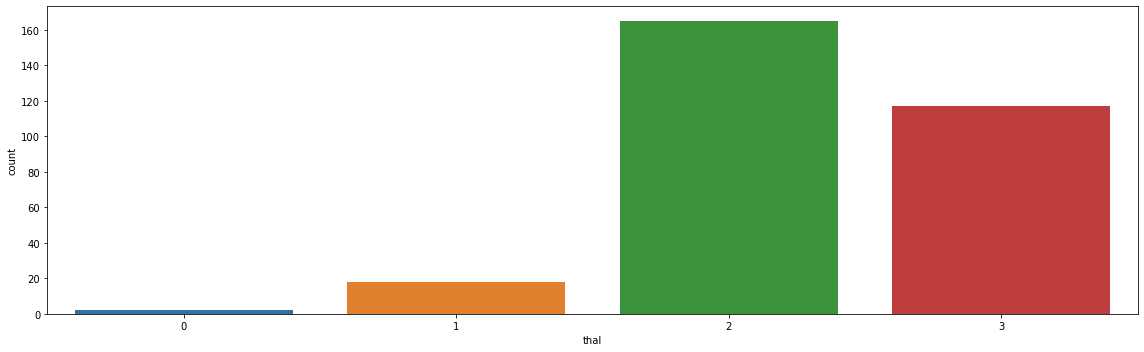

In [19]:
plt.figure(figsize=(16,5))
sns.countplot(heart['thal'])
plt.tight_layout()

**People have thal 2 mostly.**

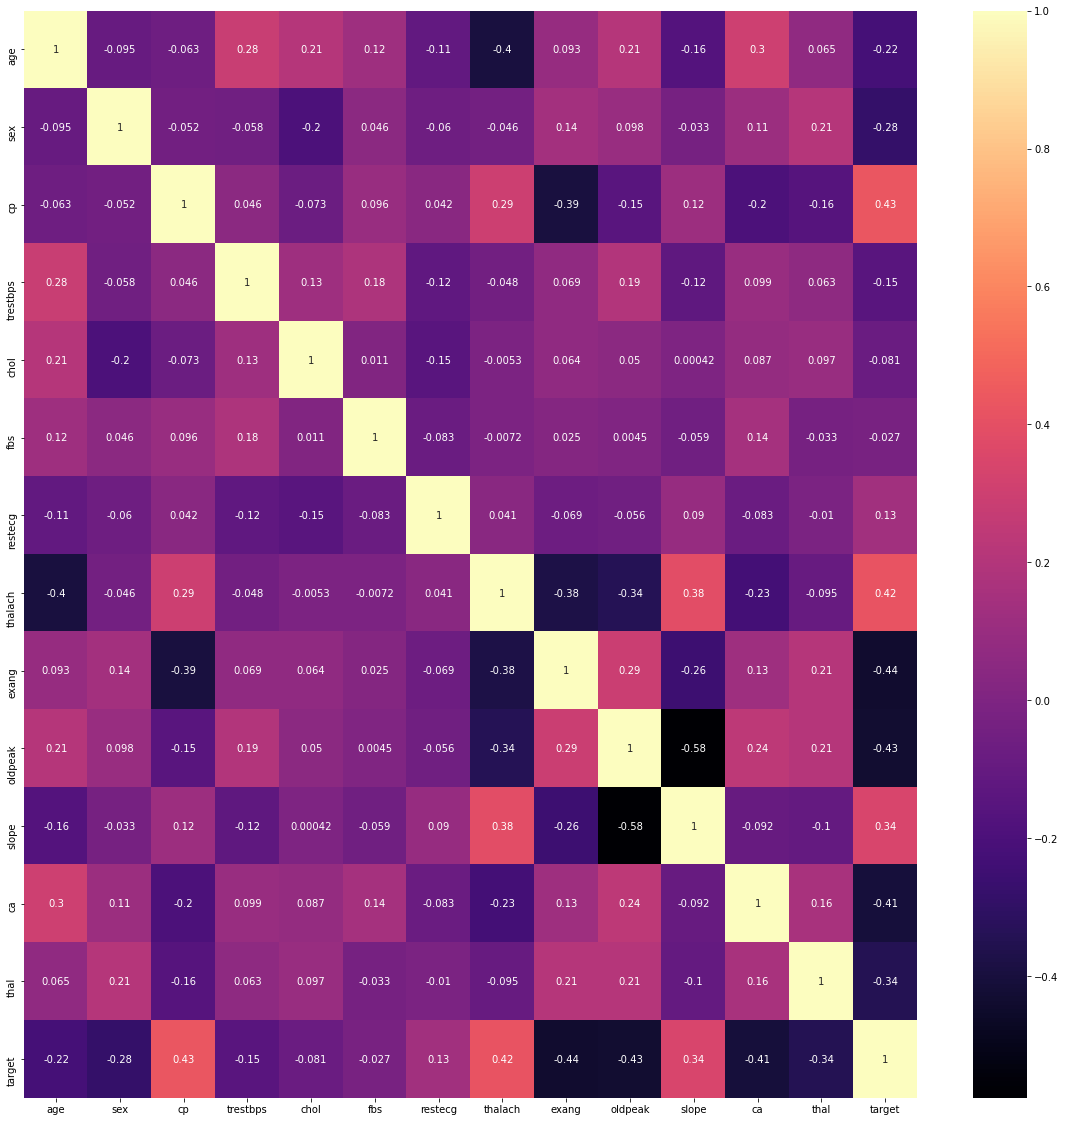

In [20]:
#Heatmap to check correlations

corrmat = heart.corr()

top_corr_features = corrmat.index

plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(heart[top_corr_features].corr(),annot=True,cmap="magma")


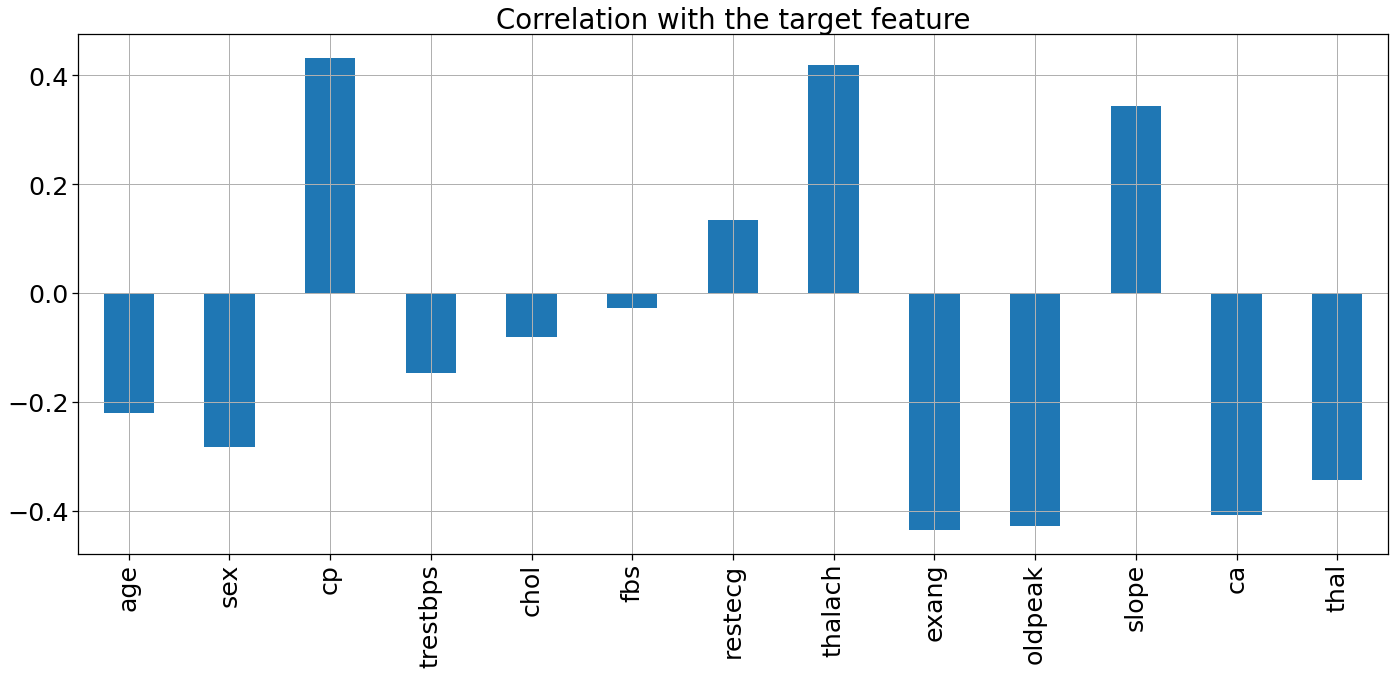

In [21]:
sns.set_context('notebook',font_scale = 2.3)
heart.drop('target', axis=1).corrwith(heart.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

In [22]:
heartdata = pd.get_dummies(heart, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [23]:
heartdata.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


# Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
standardScaler = StandardScaler()

In [26]:
#columns which needs to be scale
scaleColumns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [27]:
# new dataframe heartdata and adding scaleColumns in it.
heartdata[scaleColumns] = standardScaler.fit_transform(heartdata[scaleColumns])

In [28]:
heartdata.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.267966,-0.376556,-0.667728,0.806035,-0.037124,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.157260,0.478910,-0.841918,0.237495,1.773958,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.724733,0.764066,-1.403197,-1.074521,1.342748,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.728383,0.935159,-0.841918,0.499898,-0.899544,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.839089,0.364848,0.919336,-1.905464,0.739054,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

Set a variable X equal to the features and a variable y equal to the target column.

In [30]:
X=heartdata.drop(["target"],axis=1)
y=heartdata["target"]

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model. Taking training data 80% and 20% for model testing.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Building a K-Nearest Neighbor Classifier model

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

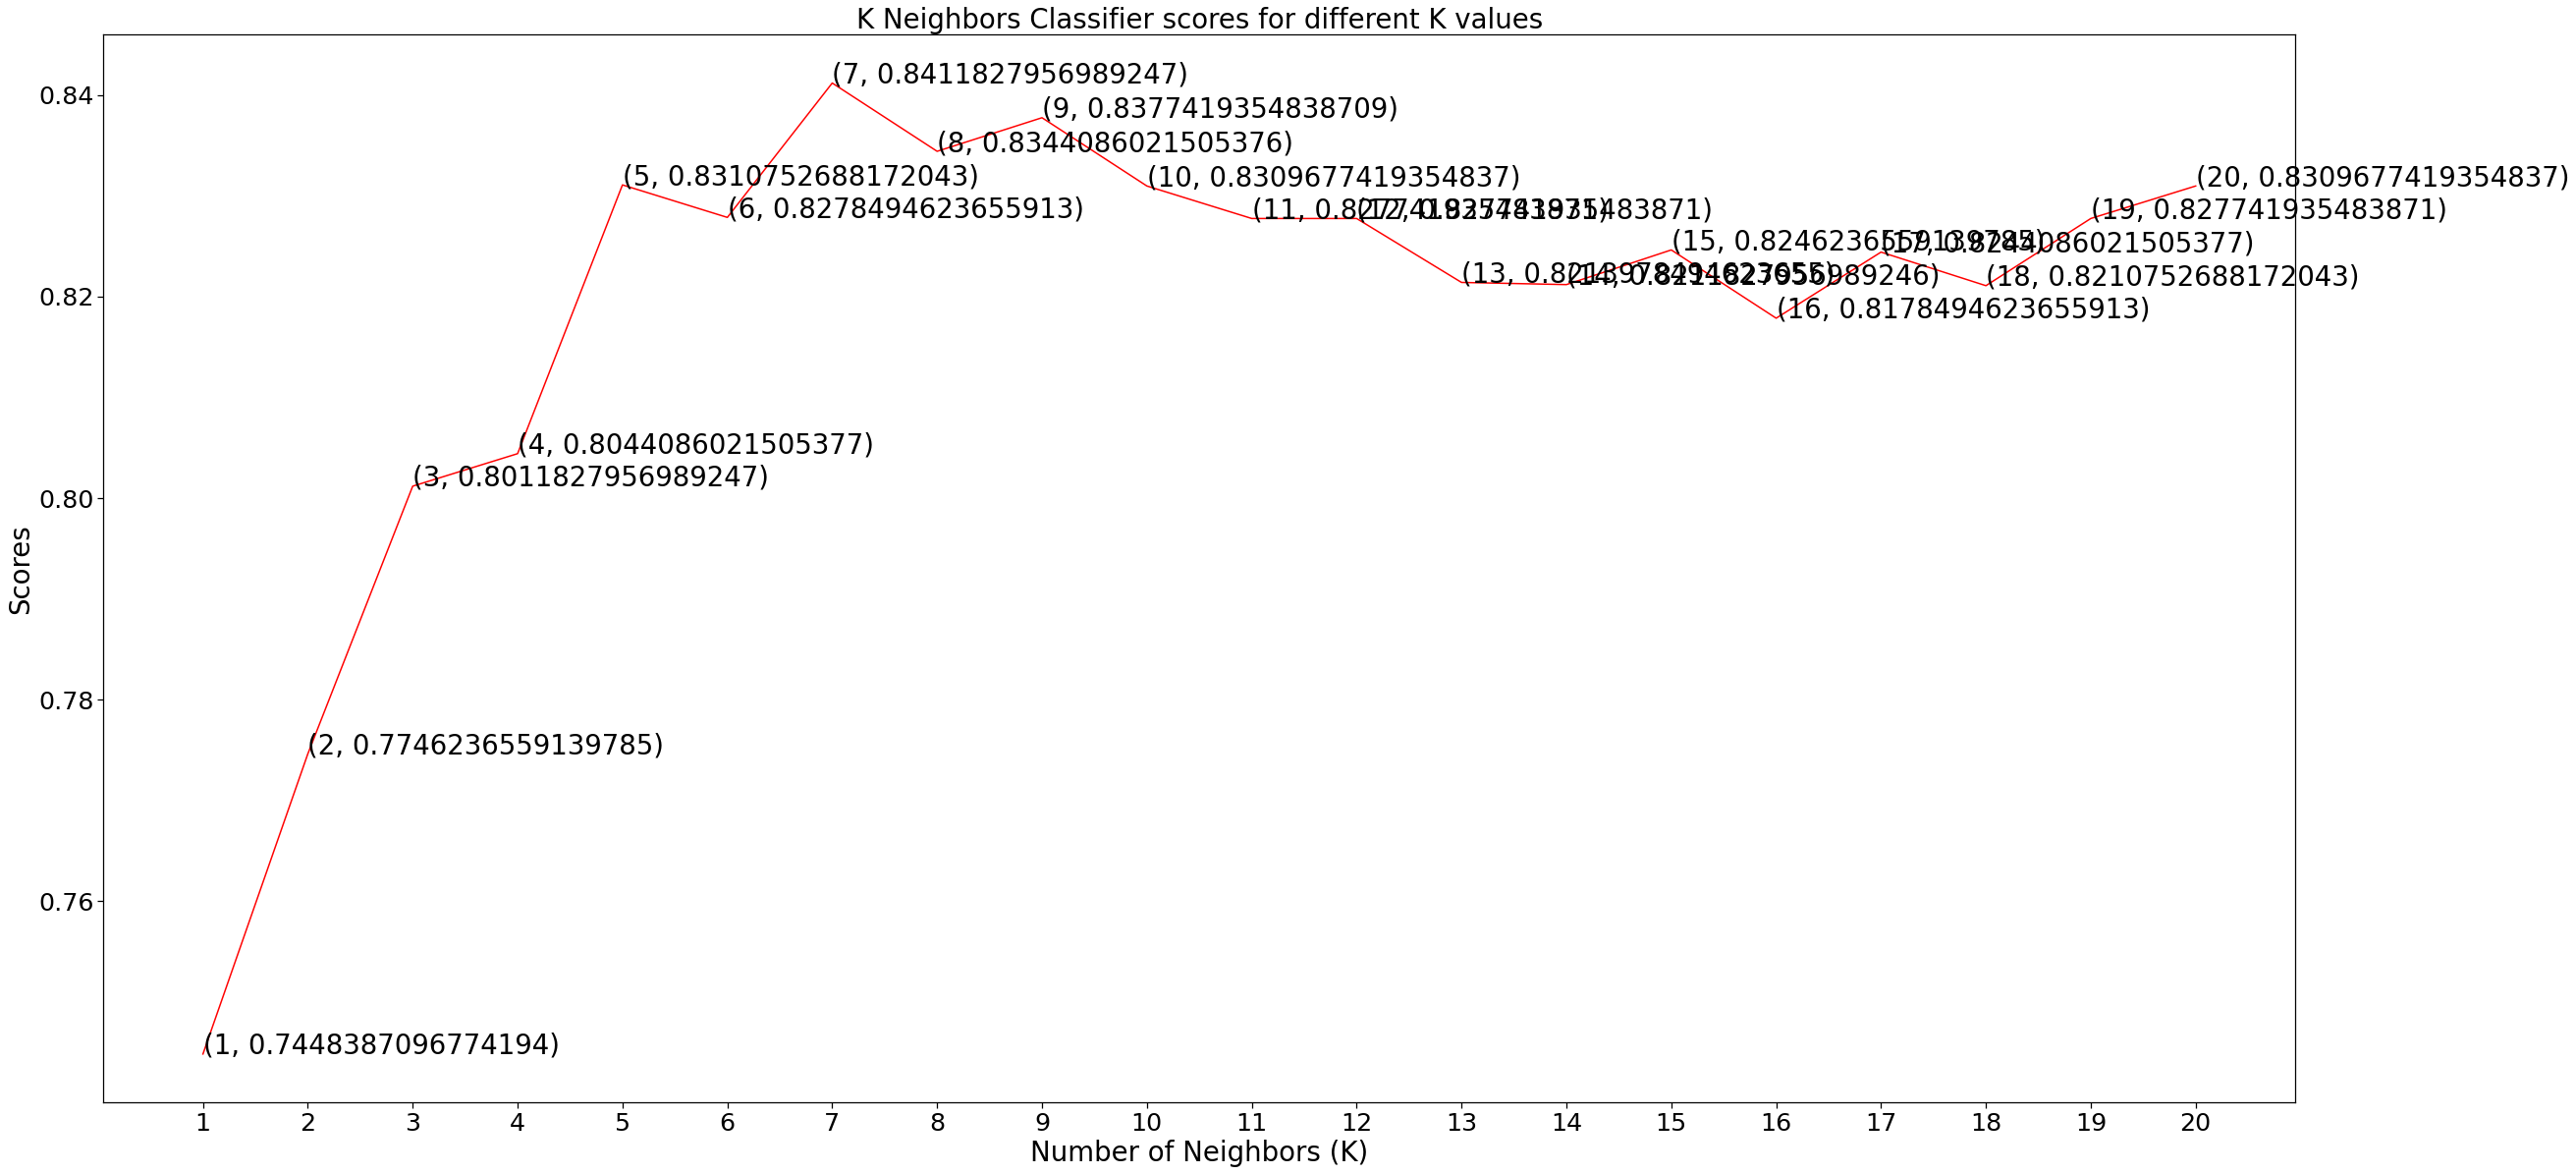

In [43]:
plt.figure(figsize=(40,20))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [64]:
knn_classifier = KNeighborsClassifier(n_neighbors = 7)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [65]:
score.mean()

0.8411827956989247

**As you can see, we achieved the maximum score of 84% when the number of neighbors was chosen to be 7.**

# Building a DecisionTreeClassifier model

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dtree = DecisionTreeClassifier()

In [53]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
predictions = dtree.predict(X_test)

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        26
           1       0.83      0.83      0.83        35

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [57]:
print(confusion_matrix(y_test,predictions))

[[20  6]
 [ 6 29]]


# Training the Random Forest model

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rfc = RandomForestClassifier(n_estimators=100)

In [67]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        26
           1       0.83      0.83      0.83        35

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [69]:
print(confusion_matrix(y_test,predictions))

[[20  6]
 [ 6 29]]


# Support Vector Machine Classifier Model

In [73]:
from sklearn.svm import SVC

In [74]:
svc_model = SVC()

In [75]:
svc_model.fit(X_train,y_train)

SVC()

In [76]:
predictions = svc_model.predict(X_test)

In [77]:
print(confusion_matrix(y_test,predictions))

[[25  1]
 [ 3 32]]


In [78]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93        26
           1       0.97      0.91      0.94        35

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



# Conclusion
The project involved analysis of the heart disease patient dataset with proper data processing. Then, 4 models were trained and tested with maximum scores as follows:

K Neighbors Classifier: 84%

Decision Tree Classifier: 80%

Random Forest Classifier: 80%

Support Vector Classifier: 93%

### Support Vector Classifier is giving the highest accuracy for heart disease prediction. 